# Student Performance: Regole Associative e Apprendimento Supervisionato

## Descrizione del Notebook

L’analisi della Student Performance rappresenta un campo cruciale per comprendere i fattori che influenzano il rendimento accademico e sviluppare strategie mirate per ottimizzare l’apprendimento. Questo lavoro combina tecniche di Supervised Learning e Association Rules per estrarre insight significativi dai dati degli studenti, migliorando la capacità di predizione e interpretazione.

In particolare, l’algoritmo **Apriori** viene impiegato per identificare regole associative nascoste nelle abitudini e nei comportamenti degli studenti, fornendo una visione più dettagliata delle associazioni tra variabili educative. In un secondo momento, il modello integra  **Decision Trees**, **k-NN** e **ANN** per la classificazione del rendimento accademico, ottimizzato negli iperparametri per ridurre l’overfitting e migliorare la generalizzazione. Concludendo poi con una panoramica che unisce i risultati ottenuti dalle regole associative (tramite algoritmo Apriori) e dai modelli predittivi supervisionati, si ottiene una comprensione più profonda delle dinamiche che influenzano il successo scolastico.

Grazie a questa combinazione di metodologie, il progetto non solo permette di prevedere la performance degli studenti, ma offre anche strumenti analitici per identificare le strategie di apprendimento più efficaci, contribuendo a decisioni informate nel contesto educativo.

---

All'interno del notebook sono state svolte le seguenti attività principali:

- **Caricamento e descrizione del dataset**: Analisi delle variabili disponibili, loro tipologia e significato.
- **Preprocessing dei dati**: Rimozione delle variabili non necessarie, gestione delle variabili categoriche e numeriche, trasformazione della variabile target per la classificazione binaria.
- **Regole associative**: Applicazione dell’algoritmo Apriori per individuare combinazioni frequenti di caratteristiche associate al rendimento scolastico, con calcolo di supporto, confidence e lift delle regole estratte.
- **Costruzione di modelli predittivi supervisionati**: Implementazione e valutazione di Decision Tree, k-NN e Artificial Neural Network, con suddivisione del dataset in training e test set, bilanciamento delle classi tramite SMOTE e standardizzazione delle feature.
- **Valutazione delle performance**: Analisi delle matrici di confusione, accuratezza e tassi di errore su training e test set, confronto tra i modelli e discussione dei risultati ottenuti.
- **Conclusioni**: Sintesi dei principali insight emersi dall’analisi, con particolare attenzione alle variabili più influenti e alle implicazioni pratiche per il contesto educativo.

Il notebook fornisce quindi un workflow completo, dalla preparazione dei dati all’interpretazione dei risultati, per supportare decisioni basate sui dati nell’ambito dell’istruzione.

## Indice

- [Descrizione Dataset](#descrizione-del-dataset)
- [Caricamento e Preprocessing dei Dati](#caricamento-e-preprocessing-dei-dati)
    - [Rimozione delle Variabili Non Necessarie](#rimozione-delle-variabili-non-necessarie)
- [Association Rules](#sequential-pattern-analysis)
    - [Metriche di Valutazione](#metriche-di-valutazione)
    - [Algoritmo Apriori](#apriori-algorithm)
    - [Risultati](#risultati-dellanalisi-sequenziale)
- [Supervised Learning: Modelli Predittivi](#supervised-learning-modelli-predittivi)
    - [Decision Tree](#decision-tree)
    - [k-Nearest Neighbors (k-NN)](#k-nearest-neighbors-k-nn)
    - [Artificial Neural Network (ANN)](#artificial-neural-network-ann)
    - [Risultati e Confronto Modelli](#risultati-e-confronto-modelli)
- [Conclusioni](#conclusioni)

## Descrizione Dataset

**Informazioni Studente**
- **StudentID**: Identificativo univoco assegnato a ciascuno studente (da 1001 a 3392).
- **Age**: Età degli studenti (da 15 a 18 anni).
- **Gender**: Genere degli studenti  
    - 0: Maschio  
    - 1: Femmina
- **Ethnicity**:  
    - 0: Caucasico  
    - 1: Afroamericano  
    - 2: Asiatico  
    - 3: Altro
- **ParentalEducation**: Livello di istruzione dei genitori  
    - 0: Nessuno  
    - 1: Scuola superiore  
    - 2: Alcuni studi universitari  
    - 3: Laurea triennale  
    - 4: Titolo superiore

**Abitudini di Studio**
- **StudyTimeWeekly**: Ore di studio settimanali (da 0 a 20).
- **Absences**: Numero di assenze durante l’anno scolastico (da 0 a 30).
- **Tutoring**: Presenza di tutoraggio  
    - 0: No  
    - 1: Sì

**Coinvolgimento dei Genitori**
- **ParentalSupport**: Livello di supporto dei genitori  
    - 0: Nessuno  
    - 1: Basso  
    - 2: Moderato  
    - 3: Alto  
    - 4: Molto alto

**Attività Extracurriculari**
- **Extracurricular**: Partecipazione ad attività extracurriculari (0: No, 1: Sì)
- **Sports**: Partecipazione ad attività sportive (0: No, 1: Sì)
- **Music**: Partecipazione ad attività musicali (0: No, 1: Sì)
- **Volunteering**: Partecipazione ad attività di volontariato (0: No, 1: Sì)

**Performance Accademica**
- **GPA**: Media dei voti su una scala da 0 a 4.0
- **GradeClass**: Classe di rendimento  
    - 0: 'A' (GPA >= 3.5)
    - 1: 'B' (3.0 <= GPA < 3.5)
    - 2: 'C' (2.5 <= GPA < 3.0)
    - 3: 'D' (2.0 <= GPA < 2.5)
    - 4: 'F' (GPA < 2.0)

---

## Caricamento e Preprocessing dei Dati

In [2]:
import pandas as pd

student_data = pd.read_csv('Student_performance_data.csv')
student_data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


Non sono presenti valori NA nel dataset, quindi non è necessario effettuare operazioni di imputazione. Tuttavia, è importante rimuovere le variabili non necessarie.

### Rimozione delle variabili non necessarie

La variabile **GPA** è stata rimossa dal dataset perché l’obiettivo del progetto è, in una prima fase, l’analisi delle regole associative, e successivamente la classificazione del rendimento accademico degli studenti. In entrambe le fasi, ho preferito lavorare con variabili discrete piuttosto che continue.
Poiché la variabile **GradeClass** è una classificazione derivata direttamente dal valore di GPA, mantenere entrambe avrebbe introdotto ridondanza e potenziale ambiguità.
Per garantire coerenza nell’approccio di classificazione ed evitare duplicazioni, ho quindi scelto di utilizzare esclusivamente **GradeClass** come variabile target nella sezione di apprendimento supervisionato.

In [3]:
student_data = student_data.drop(columns=['StudentID', 'GPA'])
student_data.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,4.0


Nel codice che segue, analizziamo la tipologia delle variabili presenti nel dataset `student_data`, distinguendo tra variabili categoriche (ordinali) e numeriche (discrete o continue). Questo passaggio è fondamentale per decidere come trattare ciascuna variabile nelle successive fasi di preprocessing e modellazione, ad esempio scegliendo se applicare tecniche di codifica per le categoriche o di normalizzazione per le numeriche.

In [4]:
for col in student_data.columns:
    if col in ['ParentalEducation','ParentalSupport','GradeClass']:
        print(f"{col}: Categorical (Ordinal)")
    elif col in ['Gender', 'Ethnicity', 'Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering']:
        print(f"{col}: Categorical (Nominal)")
    elif col in ['Age', 'Absences']:
        print(f"{col}: Numerical (Discrete)")
    elif col in ['StudyTimeWeekly']:
        print(f"{col}: Numerical (Continuous)")
    else:
        print(f"{col}: Unknown type")

Age: Numerical (Discrete)
Gender: Categorical (Nominal)
Ethnicity: Categorical (Nominal)
ParentalEducation: Categorical (Ordinal)
StudyTimeWeekly: Numerical (Continuous)
Absences: Numerical (Discrete)
Tutoring: Categorical (Nominal)
ParentalSupport: Categorical (Ordinal)
Extracurricular: Categorical (Nominal)
Sports: Categorical (Nominal)
Music: Categorical (Nominal)
Volunteering: Categorical (Nominal)
GradeClass: Categorical (Ordinal)


### Trasformazione delle variabili in binarie

Dopo aver analizzato la tipologia delle variabili presenti nel dataset, ho effettuato una serie di trasformazioni per convertire le variabili numeriche e categoriche in variabili binarie, rendendo il dataset adatto sia al frequent pattern mining che ai modelli di classificazione supervisionata.

Le principali trasformazioni effettuate sono:

- **Variabili numeriche**:  
    - *StudyTimeWeekly* e *Absences* sono state suddivise in intervalli (range) e trasformate in più colonne binarie che indicano la presenza o meno di ciascun range.
    - *Age* è stata suddivisa in due gruppi (15-16 e 17-18 anni), ciascuno rappresentato da una variabile binaria.

- **Variabile target**:  
    - *GradeClass* è stata convertita in due variabili binarie: una per il buon rendimento (`GradeClass_Good`) e una per il rendimento insufficiente (`GradeClass_Bad`).

- **Variabili categoriche**:  
    - Le variabili categoriche con più di due modalità (ad esempio *Ethnicity*, *ParentalEducation*, *ParentalSupport*) sono state trasformate tramite one-hot encoding, generando una colonna binaria per ciascuna categoria.
    - Le variabili già binarie sono state mantenute come tali e convertite in formato numerico (0/1) se necessario.

Infine, sono state rimosse le colonne originali che sono state trasformate, lasciando nel dataset solo le nuove variabili binarie. Questo preprocessing ha permesso di ottenere una matrice delle feature completamente binaria, fondamentale per l’applicazione dell’algoritmo Apriori e per migliorare la performance dei modelli di machine learning.

In [5]:
import pandas as pd



#Trasformo le variabili continue in variabili binarie scegliendo i range di valori:

# Trasformazione di StudyTimeWeekly in variabili binarie
student_data['StudyTimeWeekly_s'] = student_data['StudyTimeWeekly'].between(0, 5)
student_data['StudyTimeWeekly_m'] = student_data['StudyTimeWeekly'].between(6, 10)
student_data['StudyTimeWeekly_l'] = student_data['StudyTimeWeekly'].between(11, 20)

# Trasformazione di Absences in variabili binarie
student_data['Absences_s'] = student_data['Absences'].between(0, 10)
student_data['Absences_m'] = student_data['Absences'].between(11, 15)
student_data['Absences_l'] = student_data['Absences'].between(16, 20)
student_data['Absences_xl'] = student_data['Absences'] > 20

# Trasformazione di Age in variabili binarie
student_data['Age_15_16'] = student_data['Age'].between(15, 16)
student_data['Age_17_18'] = student_data['Age'].between(17, 18)

# Trasformazione di GradeClass in variabili binarie
student_data['GradeClass_Good'] = student_data['GradeClass'].isin([0, 1, 2])
student_data['GradeClass_Bad'] = student_data['GradeClass'].isin([3, 4])

# Trasformazione delle variabili categoriche in variabili binarie (one-hot encoding) dove necessario
categorical_vars = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport',
                    'Extracurricular', 'Sports', 'Music', 'Volunteering']

for col in categorical_vars:
    if student_data[col].nunique() > 2:
        dummies = pd.get_dummies(student_data[col], prefix=col)
        student_data = pd.concat([student_data, dummies], axis=1)
        student_data.drop(columns=[col], inplace=True)
    else:
        # Ensure binary columns are 0/1
        student_data[col] = student_data[col].astype(int)

# Rimuovo le colonne originali che sono state trasformate in variabili binarie
student_data = student_data.drop(columns=['StudyTimeWeekly','Age','Absences','GradeClass'])  
student_data.head()



,Gender,Tutoring,Extracurricular,Sports,Music,Volunteering,StudyTimeWeekly_s,StudyTimeWeekly_m,StudyTimeWeekly_l,Absences_s,...,ParentalEducation_0,ParentalEducation_1,ParentalEducation_2,ParentalEducation_3,ParentalEducation_4,ParentalSupport_0,ParentalSupport_1,ParentalSupport_2,ParentalSupport_3,ParentalSupport_4
0,1,1,0,0,1,0,False,False,True,True,...,False,False,True,False,False,False,False,True,False,False
1,0,0,0,0,0,0,False,False,True,True,...,False,True,False,False,False,False,True,False,False,False
2,0,0,0,0,0,0,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
3,1,0,1,0,0,0,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,1,1,0,0,0,0,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False


## Association Rules

Le Association Rules sono una tecnica di data mining utilizzata per identificare relazioni significative tra variabili in un dataset. A differenza dell'analisi dei pattern sequenziali, che si basa su dati temporali, le regole di associazione permettono di individuare configurazioni di caratteristiche che si verificano con una certa frequenza, senza necessariamente seguire un ordine temporale.

In questo progetto, le regole di associazione vengono applicate per esplorare le relazioni tra fattori educativi, identificando pattern ricorrenti che possono influenzare la performance degli studenti. Analizzando la co-occorrenza di specifici attributi, possiamo individuare connessioni utili per comprendere meglio le dinamiche del rendimento scolastico. Alcuni esempi includono:

- Quali combinazioni di abitudini, supporto familiare e attività extracurriculari si verificano più frequentemente tra studenti con buon rendimento?

- Quali configurazioni di assenze, livello di studio e coinvolgimento in tutoraggio sono più comuni nei gruppi con performance più basse?

### Metriche di valutazione

- **Support**: la frequenza con cui una regola appare nel dataset:
    $$\text{support} (A\rightarrow B) = \frac{\text{support(\{A,B\})}}{|T|} $$
- **Confidence**: la probabilità che, dato un certo pattern, ne segua un altro:
    $$\text{confidence} (A\rightarrow B) = \frac{\text{support}(A\rightarrow B)}{\text{support}(A)} \quad \text{range}[0, 1]$$
- **Lift**: misura la forza della regola rispetto all’indipendenza statistica:
    $$\text{lift} (A\rightarrow B) = \frac{\text{confidence}(A\rightarrow B)}{\text{support}(B)} \quad \text{range}[0, +\infty]$$

### Algoritmo Apriori 
L’algoritmo Apriori è un metodo classico utilizzato per l’estrazione di pattern frequenti all’interno di dataset di grandi dimensioni. Il suo principio chiave si basa sulla seguente osservazione:

    Se un insieme di elementi è frequente, tutti i suoi sottoinsiemi devono esserlo.
    Allo stesso modo, se un insieme non è frequente, allora nessun suo superset potrà esserlo.

Questo approccio consente di ridurre significativamente lo spazio di ricerca, evitando di esaminare combinazioni che non soddisfano i criteri di frequenza minimi.

In questo progetto, l’algoritmo Apriori viene utilizzato per identificare combinazioni ricorrenti di caratteristiche tra gli studenti. Questi pattern possono fornire indicazioni utili sui fattori che influenzano maggiormente il rendimento accademico.

Per assicurare la significatività dei risultati, sono stati impostati i seguenti parametri:

- Supporto minimo: 0.15 → il pattern deve apparire almeno nel 15% degli studenti.

- Confidence minima: 0.70 → almeno il 70% dei casi in cui compare la parte sinistra della regola deve implicare la parte destra.

Questi valori permettono di ottenere regole affidabili e statisticamente rilevanti, mantenendo al tempo stesso una buona interpretabilità.

In [6]:
from mlxtend.frequent_patterns import apriori, association_rules
# Trova gli itemset frequenti
student_data_bool = student_data.astype(bool)  # Converte tutte le colonne in bool
frequent_itemsets = apriori(student_data_bool, min_support=0.15, use_colnames=True)
# Genera le regole di associazione
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Visualizza le regole
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


           antecedents        consequents   support  confidence      lift
0  (StudyTimeWeekly_s)   (GradeClass_Bad)  0.185619    0.746218  1.098434
1  (StudyTimeWeekly_m)   (GradeClass_Bad)  0.151756    0.706226  1.039564
2    (GradeClass_Good)       (Absences_s)  0.268395    0.837027  2.369431
3         (Absences_s)  (GradeClass_Good)  0.268395    0.759763  2.369431
4         (Absences_l)   (GradeClass_Bad)  0.163462    0.933174  1.373632
5        (Absences_xl)   (GradeClass_Bad)  0.281355    0.960057  1.413204
6  (ParentalSupport_1)   (GradeClass_Bad)  0.150084    0.734151  1.080671
7  (Age_15_16, Gender)   (GradeClass_Bad)  0.177676    0.705980  1.039203


### Risultati dell'Association Rules

Di seguito sono riportate tutte le regole associative estratte tramite l’algoritmo Apriori, con i relativi valori di **supporto** , **confidenza** e **lift**. Ogni regola mostra la relazione tra variabili binarie/categorical del dataset e la probabilità che si verifichino insieme in modo statisticamente significativo.
\[
\begin{array}{|c|l|c|c|c|}
\hline
\# & \text{Pattern (Antecedente} \Rightarrow \text{Consequente)} & \text{Supporto} & \text{Confidenza} & \text{Lift} \\
\hline
1 & (\text{StudyTimeWeekly\_s}) \Rightarrow (\text{GradeClass\_Bad}) & 0.186 & 0.746 & 1.10 \\
2 & (\text{StudyTimeWeekly\_m}) \Rightarrow (\text{GradeClass\_Bad}) & 0.152 & 0.706 & 1.04 \\
3 & (\text{Absences\_s}) \Rightarrow (\text{GradeClass\_Good}) & 0.268 & 0.760 & 2.37 \\
4 & (\text{GradeClass\_Good}) \Rightarrow (\text{Absences\_s}) & 0.268 & 0.837 & 2.37 \\
5 & (\text{Absences\_l}) \Rightarrow (\text{GradeClass\_Bad}) & 0.163 & 0.933 & 1.37 \\
6 & (\text{Absences\_xl}) \Rightarrow (\text{GradeClass\_Bad}) & 0.281 & 0.960 & 1.41 \\
7 & (\text{ParentalSupport\_1}) \Rightarrow (\text{GradeClass\_Bad}) & 0.150 & 0.734 & 1.08 \\
8 & (\text{Age\_15\_16}, \text{Gender}) \Rightarrow (\text{GradeClass\_Bad}) & 0.178 & 0.706 & 1.04 \\
\hline
\end{array}
\]

L’association rule tramite l’algoritmo Apriori ha permesso di identificare associazioni significative tra le variabili socio-demografiche, le abitudini e la performance accademica degli studenti. In particolare, sono emersi pattern ricorrenti che collegano bassi livelli di studio settimanale e un alto numero di assenze a un rendimento scolastico insoddisfacente (GPA basso).

In diversi casi il lift supera di poco il valore di 1, suggerendo che le associazioni potrebbero essere deboli e non sempre statisticamente significative. Tuttavia, alcuni pattern come l’associazione tra molte assenze (`Absences_xl`,`Absences_l`) e la classe di rendimento negativo (`GradeClass_Bad`), presentano un lift elevato (>1.3), indicando una dipendenza notevole tra questi fattori. Questi risultati confermano l’importanza delle variabili comportamentali nella determinazione della performance scolastica. Inoltre, l'associazione "opposta" tra un basso numero di assenze e un buon rendimento scolastico suggerisce che la frequenza scolastica sia un indicatore chiave del successo accademico.

## Supervised Learning: Modelli Predittivi

I modelli predittivi sono strumenti di machine learning utilizzati per stimare o prevedere il valore di una variabile target (ad esempio il `GPA` nel caso di regressione e `GradeClass` nel caso di classificazione) sulla base di un insieme di variabili esplicative (feature). Il loro scopo principale è identificare pattern e relazioni nei dati che permettano di effettuare previsioni su nuovi casi non ancora osservati.

Il funzionamento di un modello predittivo si basa su due fasi principali, una di addestramento e l'altra di predizione.
Per fare ciò, viene diviso il dataset iniziale in due parti: un training set, utilizzato per addestrare il modello, e un test set, utilizzato per valutarne le performance. In questo notebook, l'80% dei dati viene utilizzato per il training e il 20% per il test. Utilizzerò la variabile `GradeClass` come target, mentre le altre variabili saranno utilizzate come features.

Sono stati utilizzati diversi modelli predittivi supervisionati per stimare il rendimento accademico degli studenti:
- **Decision Tree**: Modello ad albero che suddivide i dati in base a regole decisionali per prevedere la `GradeClass`.
- **k-Nearest Neighbors (k-NN)**: Modello che prevede la `GradeClass` di uno studente sulla base dei valori osservati nei "k" studenti più simili.
- **Artificial Neural Network (ANN)**: Modello ispirato alle reti neurali biologiche, in grado di apprendere relazioni complesse e non lineari tra le variabili.

Questi modelli sono stati confrontati in termini di accuratezza e capacità di generalizzazione, al fine di individuare l’approccio più efficace per la previsione del rendimento scolastico e verificare se le associazioni identificate nell'analisi associativa si riflettono anche nelle performance predittive.

In [7]:
print("Distribuzione delle classi:")
print(student_data[['GradeClass_Good', 'GradeClass_Bad']].sum() / len(student_data))


Distribuzione delle classi:
GradeClass_Good    0.320652
GradeClass_Bad     0.679348
dtype: float64


L'analisi preliminare del dataset ha evidenziato una distribuzione sbilanciata tra le classi:

- La classe `GradeClass_Bad` rappresenta circa il 68% del totale.

- La classe `GradeClass_Good` costituisce il 32% del dataset.

Questa disparità può influenzare significativamente le performance dei modelli di apprendimento automatico, specialmente quelli basati su alberi decisionali e K-NN, che tendono a prediligere la classe maggioritaria, riducendo la capacità di individuare correttamente la classe minoritaria.

Per affrontare questo problema e migliorare la generalizzazione del modello, ho adottato il metodo SMOTE (Synthetic Minority Over-sampling Technique).

**Cos'è SMOTE?**  
SMOTE (Synthetic Minority Over-sampling Technique) è una tecnica di oversampling utilizzata per bilanciare dataset sbilanciati. Invece di duplicare semplicemente i campioni della classe minoritaria, SMOTE genera nuovi esempi sintetici interpolando tra i punti esistenti della classe minoritaria. Questo processo avviene nello spazio delle feature: per ogni campione minoritario, vengono selezionati i suoi vicini più prossimi e vengono creati nuovi punti lungo il segmento che li collega. In questo modo, si arricchisce la varietà dei dati della classe minoritaria, riducendo il rischio di overfitting e migliorando la capacità del modello di apprendere pattern rappresentativi anche per la classe meno frequente.

Vantaggi dell'approccio SMOTE:
- Migliora la capacità del modello di riconoscere correttamente entrambe le classi.
- Riduce il rischio di overfitting, soprattutto nei modelli ad alta complessità.
- Mantiene una distribuzione più equilibrata tra le classi, evitando distorsioni nei risultati.

In [8]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

X= student_data.drop(columns=['GradeClass_Good', 'GradeClass_Bad'])
y = student_data['GradeClass_Good']  # Target binario: 1 se Good, 0 se Bad

#Suddivisione train-test stratificata (Mantiene la proporzione delle classi visto che sono sbilanciate)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#Bilanciamento del training set con SMOTE (per evitare sbilanciamento)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

#Scaling solo dopo bilanciamento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)  # Il test set rimane invariato

print(f"Dimensioni Training set bilanciato: {X_train_balanced.shape}")
print(f"Dimensioni Test set originale: {X_test.shape}")


Dimensioni Training set bilanciato: (2600, 29)
Dimensioni Test set originale: (479, 29)


### Decision Tree

Il **Decision Tree** è un modello di apprendimento supervisionato che suddivide iterativamente il dataset in sottoinsiemi più omogenei rispetto alla variabile target, costruendo una struttura ad albero composta da nodi decisionali e foglie.

#### Principi di base

- **Nodo radice**: rappresenta l’intero dataset.
- **Nodi interni**: ciascun nodo valuta una condizione su una delle feature.
- **Rami**: ogni ramo corrisponde a un possibile esito della condizione.
- **Foglie**: rappresentano la classe predetta

#### Processo di costruzione

1. **Scelta della feature di split**: per ogni nodo, il modello seleziona la variabile e la soglia che meglio separano le classi, massimizzando una metrica di purezza (Gini index nel caso di questo lavoro)
2. **Suddivisione ricorsiva**: il dataset viene suddiviso in base alla regola scelta, e il processo si ripete sui sottoinsiemi risultanti.
3. **Condizione di arresto**: la crescita dell’albero si interrompe quando si raggiunge una profondità massima (qui fissata a 5).

#### Vantaggi

- **Interpretabilità**: le regole decisionali sono facilmente leggibili.
- **Gestione di dati misti**: può lavorare sia con variabili numeriche che categoriche.
- **Nessuna necessità di scaling**: non richiede la standardizzazione delle feature.

#### Limiti

- **Overfitting**: alberi troppo profondi possono adattarsi eccessivamente ai dati di training.
- **Sensibilità ai dati sbilanciati**: tende a favorire la classe maggioritaria se non opportunamente bilanciato.

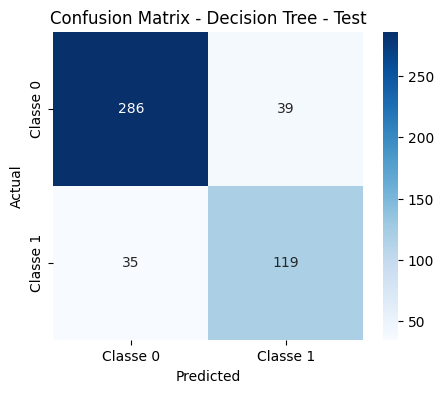

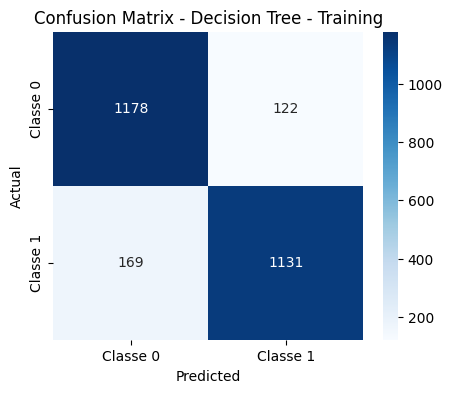

Test Accuracy: 0.846
Test Error Rate: 0.154
Train (balanced) Accuracy: 0.888
Train (balanced) Error Rate: 0.112


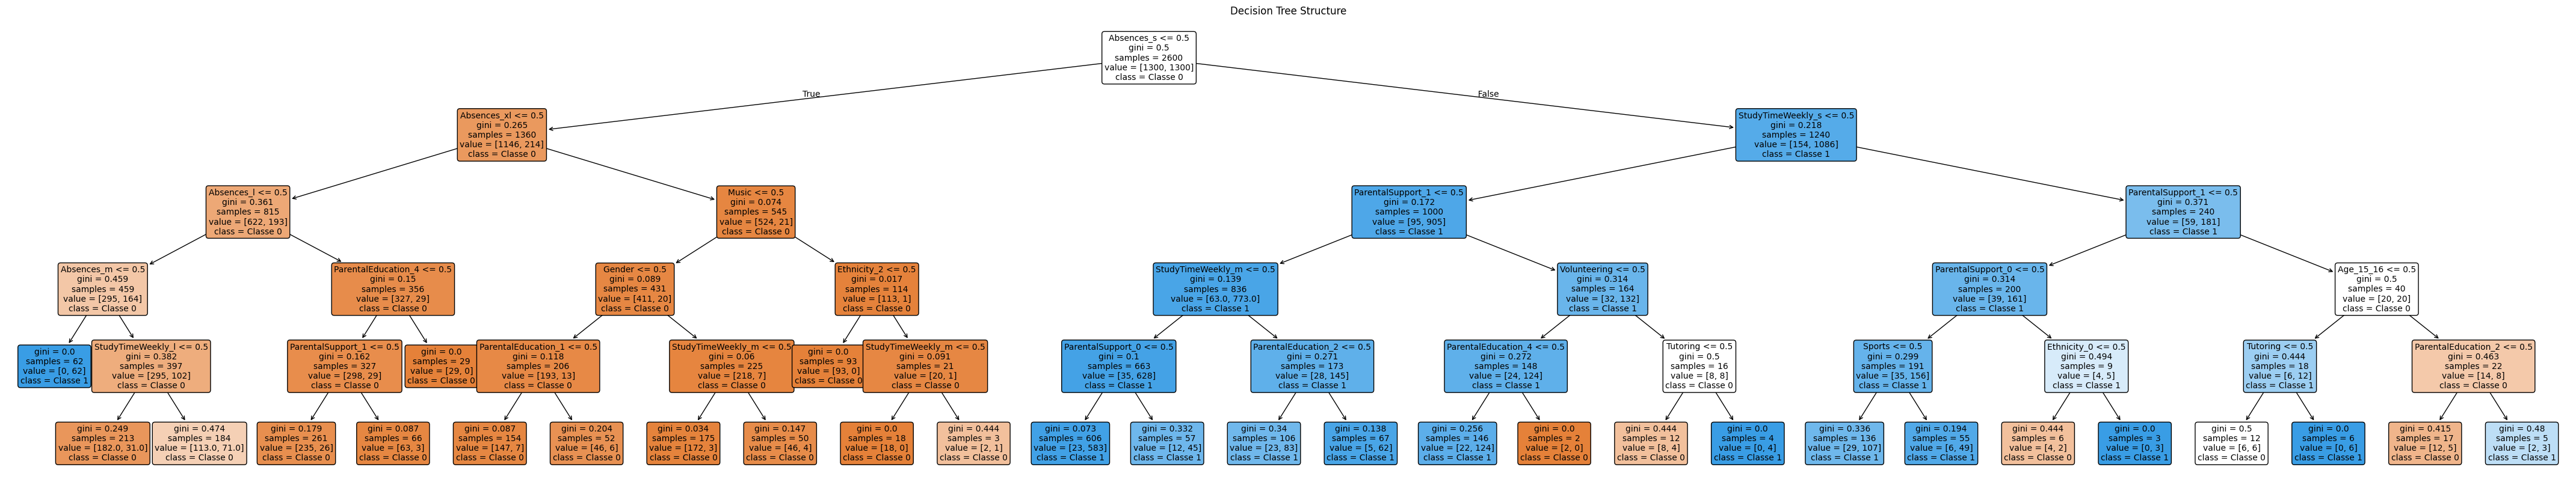

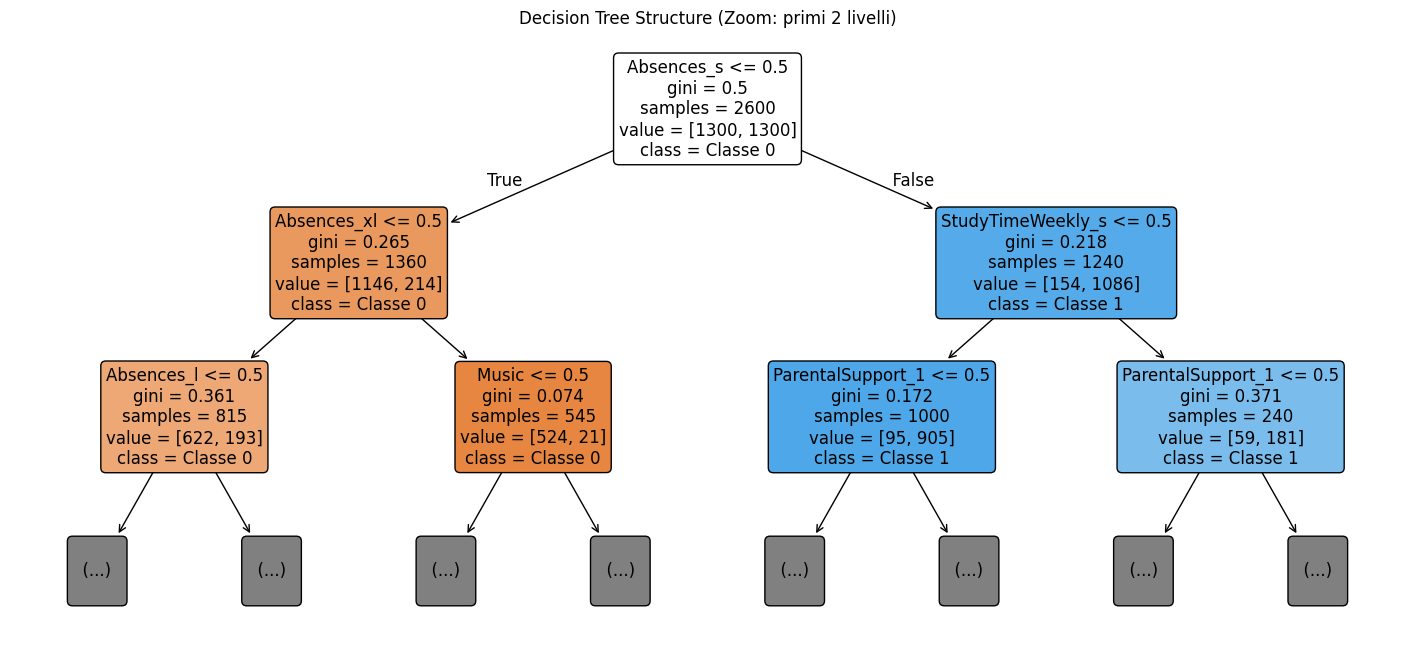

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#Creazione del Decision Tree Classifier con il dataset bilanciato
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42) #provato con max_depth=3,4,5,6,7
clf.fit(X_train_balanced, y_train_balanced)

#Predizione sul test set originale
y_pred = clf.predict(X_test)

# Predizione sul training set bilanciato
y_train_pred = clf.predict(X_train_balanced)

# Calcolo delle metriche di valutazione

# Confusion Matrix del test set
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree - Test')
plt.show()

# Confusion Matrix del training set bilanciato
cm_train = confusion_matrix(y_train_balanced, y_train_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree - Training')
plt.show()


# Accuracy e Error Rate su test set
acc = accuracy_score(y_test, y_pred)
err = 1 - acc
print(f"Test Accuracy: {acc:.3f}")
print(f"Test Error Rate: {err:.3f}")

# Accuracy e Error Rate su training set bilanciato
y_train_pred = clf.predict(X_train_balanced)
acc_train = accuracy_score(y_train_balanced, y_train_pred)
err_train = 1 - acc_train
print(f"Train (balanced) Accuracy: {acc_train:.3f}")
print(f"Train (balanced) Error Rate: {err_train:.3f}")

#Visualizzazione dell'albero decisionale
plt.figure(figsize=(55, 10))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['Classe 0', 'Classe 1'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Structure")

# Visualizzazione dell'albero decisionale zoomato ai primi 2 livelli
plt.figure(figsize=(18, 8))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['Classe 0', 'Classe 1'],
    filled=True,
    rounded=True,
    fontsize=12,
    max_depth=2
)
plt.title("Decision Tree Structure (Zoom: primi 2 livelli)")
plt.show()

Dopo diversi tentativi, cambiando la profondità massima dell'albero, ho scelto un modello con una profondità massima di 5, che ha mostrato un buon equilibrio tra accuratezza e complessità. La scelta della profondità è cruciale per evitare l'overfitting, in quanto un albero troppo profondo tende a memorizzare i dati di training piuttosto che generalizzare. Infatti, provando con profondità maggiori, si osservava un aumento dell'accuratezza sul training set, ma una diminuzione su quello di test, segno di overfitting.

Il risultato finale del modello Decision Tree ha mostrato un'accuratezza dell' 85% sul test set e 89% sul training set. Questo suggerisce che il modello è in grado di generalizzare bene, mantenendo una buona capacità predittiva.

Un aspetto interessante è che il primo split dell’albero decisionale avviene proprio sulla variabile `Absences`, confermando l’importanza di questo fattore nella classificazione del rendimento scolastico. Questo risultato è coerente con quanto emerso nell’analisi associativa: tra le regole con supporto e lift più elevati figurano proprio quelle che collegano una performance positiva (`GradeClass_Good`) a un basso numero di assenze (`Absences_s`). Ciò rafforza l’evidenza che le assenze rappresentano uno dei principali predittori di scarso rendimento accademico nel dataset analizzato.

### k-Nearest Neighbors (k-NN)

Il k-Nearest Neighbors (k-NN) è un algoritmo di apprendimento supervisionato utilizzato sia per problemi di classificazione che di regressione.

Nel notebook, il k-NN viene applicato per la classificazione, variando il valore di *k* (numero di vicini) e utilizzando una metrica di distanza. Quella utilizzata nel codice è la **distanza di Hamming** (`metric='hamming'`), scelta perché tutte le variabili del dataset sono numeriche o binarie (0/1). Questa infatti risulta particolarmente adatta quando le feature sono binarie o categoriche codificate come numeri interi, in quanto misura il numero di posizioni in cui i valori differiscono tra due vettori. Questo permette di valutare la "vicinanza" tra studenti in termini di caratteristiche discrete, risultando più appropriata rispetto alla distanza euclidea in questo contesto. Per ogni valore di *k*, il modello viene addestrato sul training set e valutato tramite l'accuracy sia sul training che sul test set, al fine di individuare il valore ottimale di *k* che meglio bilancia bias e varianza.

#### Vantaggi

- **Semplicità**: Non richiede una fase di training vera e propria, ma solo la memorizzazione dei dati.
- **Flessibilità**: Può modellare relazioni non lineari tra le variabili.
- **Intuitivo**: La logica del "vicino" è facilmente interpretabile.

#### Scelta del parametro *k*

La scelta del valore ottimale di *k* è stata effettuata testando diversi valori e confrontando le performance su training e test set. Un valore di *k* troppo basso (ad esempio 1) porta a un modello molto flessibile, che rischia di adattarsi troppo ai dati di training (overfitting), mentre valori troppo alti rendono il modello troppo rigido e poco sensibile alle differenze tra le classi (underfitting). Dal grafico delle accuratezze, si osserva che *k=30* rappresenta un buon compromesso: riduce l’overfitting e mantiene una buona capacità di generalizzazione, risultando il valore scelto per la valutazione finale del modello.

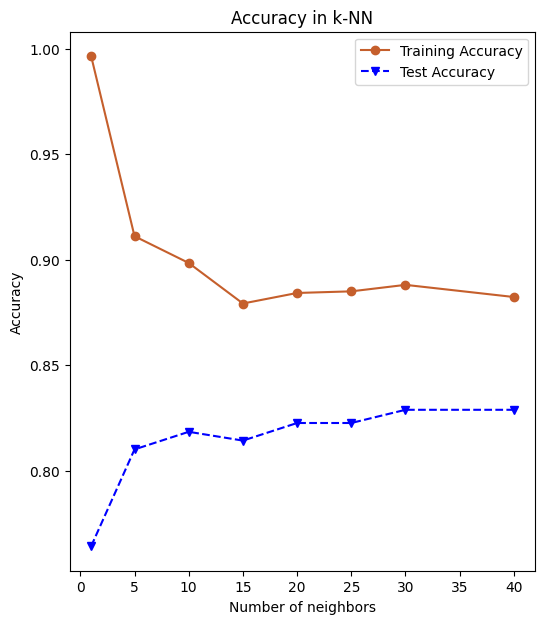

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

numNeighbors = [1, 5, 10, 15, 20, 25, 30, 40]
trainAcc = []
testAcc = []
trainErr = []
testErr = []

for k in numNeighbors:
    knn = KNeighborsClassifier(n_neighbors=k, metric='hamming')
    knn.fit(X_train_scaled, y_train_balanced)  # Usa dati scalati e bilanciati
    y_train_pred = knn.predict(X_train_scaled)
    y_test_pred = knn.predict(X_test_scaled)  # Test set rimane invariato

    #Calcolo delle metriche
    train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    trainAcc.append(train_accuracy)
    testAcc.append(test_accuracy)

    trainErr.append(1 - train_accuracy)
    testErr.append(1 - test_accuracy)
#Visualizzazione dell'Accuracy e dell'Error Rate
plt.figure(figsize=(6, 7))
plt.plot(numNeighbors, trainAcc, color='#c55f2c', marker='o', label='Training Accuracy')
plt.plot(numNeighbors, testAcc, 'bv--', label='Test Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy in k-NN')
plt.show()



Dal grafico possiamo notare che l'accuratezza del modello varia in maniera non lineare al variare di *k*, soprattutto nel test set. Il valore ottimale di *k* è stato trovato in 30, compromesso tra le accuratezze del training e del test set.
Nel codice che segue, ricalcolo nuovamente l'accuratezza del modello con *k=30* e visualizzo la matrice di confusione per analizzare le performance del modello.

Training Accuracy: 0.888
Training Error Rate: 0.112
Test Accuracy: 0.829
Test Error Rate: 0.171


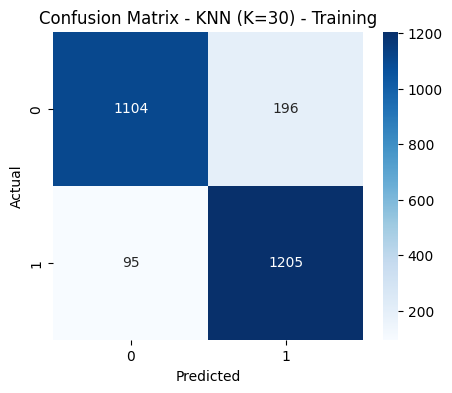

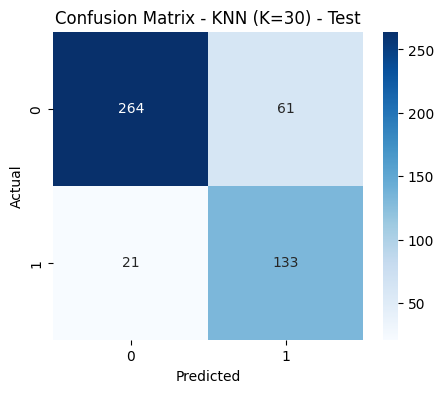

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

import matplotlib.pyplot as plt

# Imposta k=30
k = 30
knn = KNeighborsClassifier(n_neighbors=k, metric='hamming')
knn.fit(X_train_scaled, y_train_balanced)

# Predizioni
y_train_pred_knn = knn.predict(X_train_scaled)
y_test_pred_knn = knn.predict(X_test_scaled)

# Accuracy ed error rate
train_acc = accuracy_score(y_train_balanced, y_train_pred_knn)
test_acc = accuracy_score(y_test, y_test_pred_knn)
train_err = 1 - train_acc
test_err = 1 - test_acc

print(f"Training Accuracy: {train_acc:.3f}")
print(f"Training Error Rate: {train_err:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")
print(f"Test Error Rate: {test_err:.3f}")

# Confusion matrix training
cm_train = confusion_matrix(y_train_balanced, y_train_pred_knn)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - KNN (K={k}) - Training')
plt.show()

# Confusion matrix test
cm_test = confusion_matrix(y_test, y_test_pred_knn)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - KNN (K={k}) - Test')
plt.show()


Il k-NN, pur essendo un modello semplice e intuitivo, mostra performance inferiori rispetto al Decision Tree, soprattutto sul test set, dove l’accuratezza si attesta intorno all’83%. Si osserva inoltre uno scarto di circa il 6% tra training e test set, indice di un leggero overfitting. Questo suggerisce che il k-NN fatica a catturare le relazioni più complesse presenti nei dati, risultando meno efficace nella discriminazione tra le classi rispetto agli altri modelli. Nel complesso, il k-NN si conferma meno adatto in questo contesto, mentre Decision Tree al momento offre una migliore capacità predittiva e generalizzazione.

### Artificial Neural Network (ANN)

Le Artificial Neural Network (ANN) sono modelli ispirati al funzionamento del cervello umano, composte da nodi (neuroni artificiali) organizzati in strati (layer). Ogni neurone riceve input, li elabora tramite una funzione di attivazione e trasmette il risultato agli strati successivi. Le ANN sono particolarmente efficaci per modellare relazioni non lineari e complesse tra le variabili.

#### Il Perceptron

Il Perceptron è il modello base di un neurone artificiale. Funziona come segue:
- Riceve in input un vettore di caratteristiche $\mathbf{x} = [x_1, x_2, ..., x_n]$.
- Ogni input è moltiplicato per un peso $w_i$ e sommato a un bias $b$.
- La somma pesata viene passata a una funzione di attivazione (tipicamente una funzione soglia o una funzione non lineare come ReLU o sigmoid).

La formula matematica del Perceptron è:
$$
y = f\left(\sum_{i=1}^n w_i x_i + b\right)
$$
dove $f$ è la funzione di attivazione.

#### ANN Multistrato (MLP)

Un'ANN multistrato (Multi-Layer Perceptron, MLP) combina più Perceptron organizzati in strati:
- **Strato di input**: riceve i dati grezzi.
- **Strati nascosti**: ciascun neurone riceve input dagli strati precedenti e applica una funzione di attivazione non lineare.
- **Strato di output**: produce la previsione finale.

Durante l’addestramento, la rete aggiorna i pesi tramite l’algoritmo di backpropagation, minimizzando una funzione di costo (ad esempio, l’MSE per la regressione).

#### Applicazione nel notebook

Nel notebook, l’ANN è stata implementata con `MLPRegressor` di scikit-learn, che rappresenta un MLP con un singolo hidden layer da 50 neuroni e funzione di attivazione ReLU. Questo modello è in grado di apprendere pattern complessi tra le variabili socio-demografiche e il GPA degli studenti, superando i limiti dei modelli lineari semplici.

**Vantaggi dell’ANN:**
- Capacità di modellare relazioni non lineari.
- Flessibilità nell’architettura (numero di layer e neuroni).
- Buona generalizzazione se opportunamente regolarizzata.

**Limiti:**
- Richiede più dati e potenza computazionale rispetto a modelli semplici.
- Può soffrire di overfitting se non regolarizzata o se la rete è troppo complessa rispetto ai dati disponibili.

ANN Training Accuracy: 0.996
ANN Test Accuracy: 0.814
ANN Training Error Rate: 0.004
ANN Test Error Rate: 0.186


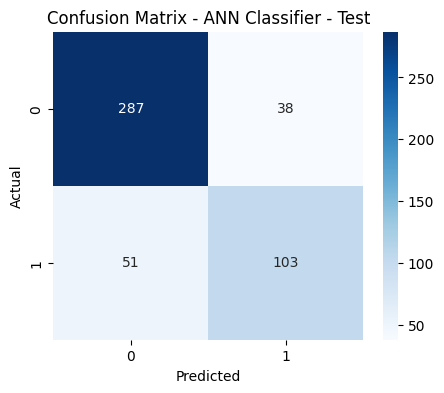

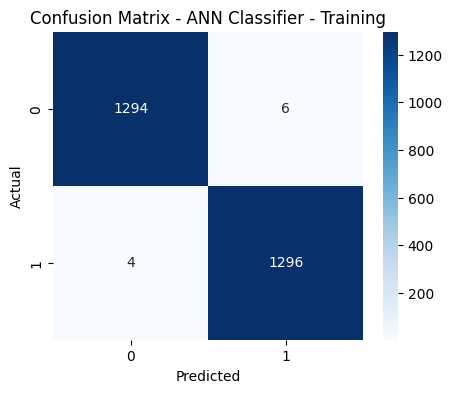

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

#Creazione del modello ANN per classificazione
ann = MLPClassifier(hidden_layer_sizes=(50), activation='relu', solver='adam', max_iter=2000, alpha=0.01, random_state=42)
ann.fit(X_train_scaled, y_train_balanced)  # Usa dati bilanciati e scalati per il training

#Predizione sui dati di test
y_train_pred_ann = ann.predict(X_train_scaled)
y_test_pred_ann = ann.predict(X_test_scaled)

#Calcolo delle metriche di valutazione
train_accuracy = accuracy_score(y_train_balanced, y_train_pred_ann)
test_accuracy = accuracy_score(y_test, y_test_pred_ann)

train_error = 1 - train_accuracy
test_error = 1 - test_accuracy

print(f"ANN Training Accuracy: {train_accuracy:.3f}")
print(f"ANN Test Accuracy: {test_accuracy:.3f}")
print(f"ANN Training Error Rate: {train_error:.3f}")
print(f"ANN Test Error Rate: {test_error:.3f}")

#Visualizzazione della Confusion Matrix per il test set
# Confusion Matrix per il test set
cm_test_ann = confusion_matrix(y_test, y_test_pred_ann)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_test_ann, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - ANN Classifier - Test')
plt.show()

# Confusion Matrix per il training set
cm_train_ann = confusion_matrix(y_train_balanced, y_train_pred_ann)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_train_ann, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - ANN Classifier - Training')
plt.show()


L’applicazione della rete neurale artificiale (ANN) al problema di classificazione del rendimento scolastico ha prodotto risultati molto interessanti. L’accuratezza sul training set è risultata elevata (oltre il 99%), mentre sul test set si attesta intorno all’81%. Questo scarto tra training e test suggerisce che la rete è in grado di apprendere efficacemente i pattern presenti nei dati, ma potrebbe essere soggetta a un leggero overfitting, nonostante l’utilizzo della regolarizzazione (alpha=0.01) e un numero moderato di neuroni nello strato nascosto.

La matrice di confusione mostra che la ANN riesce a distinguere discretamente entrambe le classi, anche se la classe minoritaria (buon rendimento) tende a essere meno riconosciuta rispetto alla maggioritaria. Questo comportamento è tipico nei dataset sbilanciati, ma l’uso di SMOTE ha contribuito a ridurre il bias verso la classe dominante.

Nel complesso, la ANN si conferma un modello potente e flessibile, capace di cogliere relazioni non lineari tra le variabili. Tuttavia, la sua maggiore complessità rispetto a modelli più semplici come il Decision Tree non si traduce necessariamente in un miglioramento significativo delle performance sul test set. In questo caso, la ANN raggiunge risultati comparabili al Decision Tree, ma con un rischio leggermente superiore di overfitting.

### Risultati e Confronto Modelli

In [13]:
results = [
    {
        "Model": "Decision Tree (best)",
        "Hyperparameters": f"max_depth={clf.max_depth}, criterion='gini', random_state=42",
        "Training Accuracy": acc_train,
        "Test Accuracy": acc
    },
    {
        "Model": f"KNN (n_neighbors={k})",
        "Hyperparameters": f"n_neighbors={k}, metric='hamming'",
        "Training Accuracy": train_acc,
        "Test Accuracy": test_acc
    },
    {
        "Model": "ANN",
        "Hyperparameters": "hidden_layer_sizes=(50), activation='relu', solver='adam', alpha=0.01, max_iter=2000",
        "Training Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy
    }
]

results_df = pd.DataFrame(results)
results_df.set_index("Model", inplace=True)
display(results_df)


,Hyperparameters,Training Accuracy,Test Accuracy
Model,,,
Decision Tree (best),"max_depth=5, criterion='gini', random_state=42",0.888077,0.845511
KNN (n_neighbors=30),"n_neighbors=30, metric='hamming'",0.888077,0.828810
ANN,"hidden_layer_sizes=(50), activation='relu', so...",0.996154,0.814196


- **Decision Tree (max_depth=5)**: Il modello ad albero ottimizzato raggiunge un’accuratezza di **0.89** sul training set e **0.85** sul test set, con uno scarto contenuto tra i due valori. Questo indica una buona capacità di generalizzazione e un rischio di overfitting limitato. La matrice di confusione evidenzia una buona discriminazione tra le classi, anche se la classe minoritaria risulta leggermente meno riconosciuta.

- **k-NN (k=30)**: Il k-Nearest Neighbors mostra performance leggermente inferiori rispetto al Decision Tree, con un’accuratezza di **0.89** sul training set e **0.83** sul test set. Il gap tra training e test è ridotto, ma la capacità di riconoscere la classe minoritaria resta inferiore rispetto agli altri modelli.

- **ANN**: La rete neurale artificiale (MLPClassifier) ottiene la migliore accuratezza sul training set (**0.99**), ma una performance sul test set discretamente inferiore (**0.81**). Questo conferma la capacità delle reti neurali di apprendere pattern complessi, ma suggerisce anche un rischio di overfitting più elevato.

Nel complesso, il Decision Tree con profondità ottimizzata emerge come il modello più bilanciato per la classificazione binaria del rendimento accademico: combina buona accuratezza, stabilità tra training e test e capacità interpretativa.

L’ANN mostra un potenziale superiore in fase di apprendimento, ma tende a sovrallenarsi, suggerendo la necessità di una regolarizzazione più attenta o di un dataset più ampio.

Il k-NN, pur mantenendo una buona accuratezza, si dimostra meno efficace nella gestione della classe minoritaria, risultando il meno competitivo tra i modelli analizzati.

## Conclusioni

L’analisi combinata di **frequent pattern mining** e dei **modelli di apprendimento supervisionato** ha permesso di ottenere una visione approfondita dei fattori che influenzano il rendimento accademico degli studenti.

L’impiego dell’**algoritmo Apriori** ha evidenziato associazioni significative tra variabili socio-demografiche, abitudini di studio e performance scolastiche, sottolineando in particolare il ruolo cruciale di **assenze, tempo di studio e supporto familiare**.

Tali variabili si confermano determinanti anche nei modelli predittivi, suggerendo una **forte coerenza tra le tecniche di pattern mining e i modelli di classificazione**. Il **Decision Tree**, in particolare, ha offerto un buon equilibrio tra accuratezza e capacità di generalizzazione, risultando tra i modelli più efficaci.

In sintesi, la sinergia tra tecniche di data mining e apprendimento supervisionato consente non solo di individuare pattern ricorrenti nei dati, ma anche di **prevedere con buona affidabilità il rendimento accademico**, fornendo indicazioni operative utili per politiche educative e interventi personalizzati.